## Analisis Descriptivo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip

## Output Steam Games

In [2]:
df_steam_games= pd.read_csv('Datos-Normalizados/output_steam_games_normalizado.csv')
df_steam_games.head(5)

,Unnamed: 0,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,88310,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140.0,Kotoshiro
1,88311,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,False,643980.0,Secret Level SRL
2,88312,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free to Play,False,670290.0,Poolians.com
3,88313,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,False,767400.0,彼岸领域
4,88315,Trickjump Games Ltd,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,"['Action', 'Adventure', 'Simulation', 'FPS', '...",http://steamcommunity.com/app/772540/reviews/?...,"['Single-player', 'Steam Achievements']",3.99,False,772540.0,Trickjump Games Ltd


In [3]:
df_steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29783 entries, 0 to 29782
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    29783 non-null  int64  
 1   publisher     23774 non-null  object 
 2   genres        28549 non-null  object 
 3   app_name      29782 non-null  object 
 4   title         29782 non-null  object 
 5   url           29783 non-null  object 
 6   release_date  29783 non-null  object 
 7   tags          29622 non-null  object 
 8   reviews_url   29782 non-null  object 
 9   specs         29114 non-null  object 
 10  price         28782 non-null  object 
 11  early_access  29783 non-null  bool   
 12  id            29782 non-null  float64
 13  developer     28533 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(11)
memory usage: 3.0+ MB


In [4]:
# Reemplaza los valores no finitos (NaN o infinito) con un valor específico, por ejemplo, 0
df_steam_games['id'] = df_steam_games['id'].replace([np.inf, -np.inf], np.nan)
df_steam_games['id'] = df_steam_games['id'].fillna(0)

# Ahora intenta convertir la columna 'id' a int
df_steam_games['id'] = df_steam_games['id'].astype(int)


In [5]:
df_steam_games['id'].head()

0    761140
1    643980
2    670290
3    767400
4    772540
Name: id, dtype: int32

In [6]:

df_steam_games['price'] = pd.to_numeric(df_steam_games['price'], errors='coerce')
df_steam_games['price'].fillna(0, inplace=True)


vemos la distribucion de precios

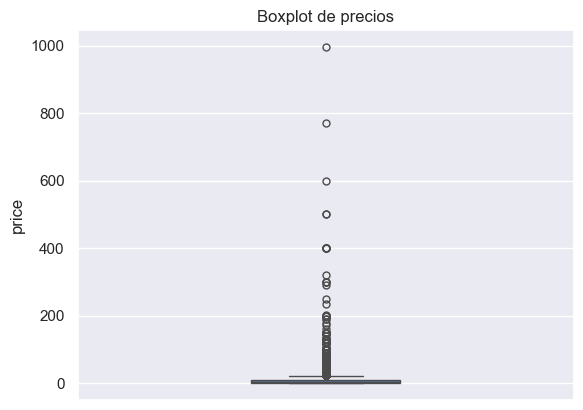

In [7]:

sns.set_theme()


ax = sns.boxplot(y=df_steam_games['price'], fliersize=5, linewidth=1, width=0.3)


plt.title('Boxplot de precios')
plt.show()


pongo un limite para poder ver mejor la distribucion de precios

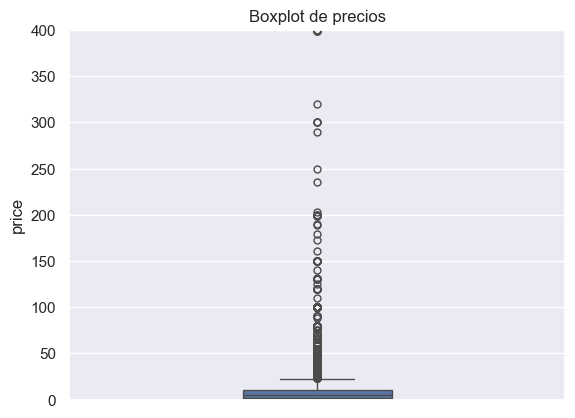

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme()


ax = sns.boxplot(y=df_steam_games['price'], fliersize=5, linewidth=1, width=0.3)


plt.ylim(0, 400)

plt.title('Boxplot de precios')
plt.show()


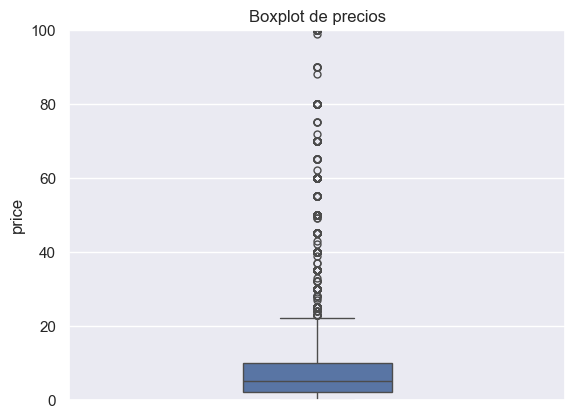

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme()


ax = sns.boxplot(y=df_steam_games['price'], fliersize=5, linewidth=1, width=0.3)


plt.ylim(0, 100)

plt.title('Boxplot de precios')
plt.show()


la mayoria de valores del precio se encuentran en numeros menores de 100

el valor normal del precio de los juegos se encuentran de 20 para abajo, aunque hay muchos outliers, se encuentra dentro de lo normal para la industria, el tratado que voy a hacer es descartar los juegos que superen los 200 dolares ya que pueden afectar mucho a los promedios, etc, ademas son muy pocos los items que superan este valor 

In [10]:

df_steam_games=df_steam_games.dropna()

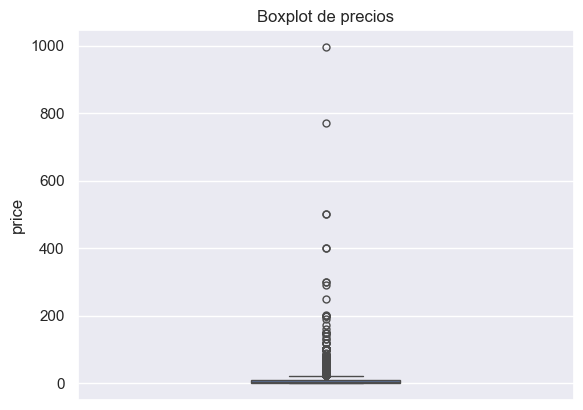

In [11]:
import seaborn as sns


sns.set_theme()


ax = sns.boxplot(y=df_steam_games['price'], fliersize=5, linewidth=1, width=0.3)


plt.title('Boxplot de precios')
plt.show()


distribucion de generos

In [12]:
# Convertimos las cadenas de géneros en listas
import ast
df_steam_games['genres'] = df_steam_games['genres'].apply(ast.literal_eval)

C:\Users\Facundete\AppData\Local\Temp\ipykernel_7740\1722720696.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values,palette='husl')


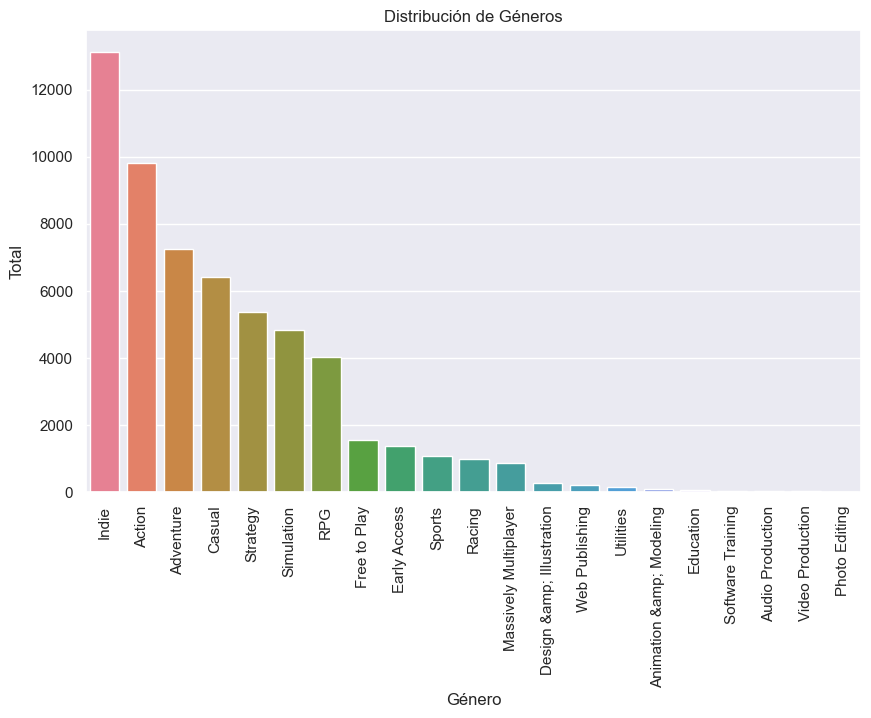

In [13]:
import pandas as pd
import seaborn as sns
import ast

# Ahora, aplanamos la lista de géneros
genres = df_steam_games['genres'].explode()

# Calculamos la frecuencia de cada género
genre_counts = genres.value_counts()

# Creamos el gráfico de barras con seaborn
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values,palette='husl')
plt.title('Distribución de Géneros')
plt.xlabel('Género')
plt.ylabel('Total')
plt.xticks(rotation=90)  # Rotamos las etiquetas del eje x para una mejor visualización
plt.show()


In [14]:
df_steam_games.to_json('steam_games.json', orient='records', lines=True)

## User Reviews

In [15]:
df_user_reviews= pd.read_csv("Datos-Normalizados/australian_user_reviews_normalizado.csv")
df_user_reviews.sample(10)

,Unnamed: 0,user_id,user_url,reviews,review_content
10241,10241,76561198044521040,http://steamcommunity.com/profiles/76561198044...,"[{'sentiment_analysis': 0, 'funny': '', 'poste...",['This game single handedly disproves the phra...
10444,10444,76561198072420528,http://steamcommunity.com/profiles/76561198072...,"[{'sentiment_analysis': 0, 'funny': '', 'poste...","[""Game has problem on launch, comes up with AC..."
13253,13253,76561198078887963,http://steamcommunity.com/profiles/76561198078...,"[{'sentiment_analysis': 2, 'funny': '', 'poste...",['This is the best game of the world!']
1417,1417,76561198073104304,http://steamcommunity.com/profiles/76561198073...,"[{'sentiment_analysis': 1, 'funny': '', 'poste...",['มัมมาก']
10633,10633,76561198088635279,http://steamcommunity.com/profiles/76561198088...,"[{'sentiment_analysis': 2, 'funny': '', 'poste...",['Best free to play game with cartoony graphics']
17508,17508,76561198059052337,http://steamcommunity.com/profiles/76561198059...,"[{'sentiment_analysis': 1, 'funny': '', 'poste...",['DAYUM THIS IS BADAASSS!']
21941,21941,D-Frag,http://steamcommunity.com/id/D-Frag,"[{'sentiment_analysis': 2, 'funny': '', 'poste...",['This is AWESOME !!!!!!! Your story is very i...
13331,13331,76561198081189561,http://steamcommunity.com/profiles/76561198081...,"[{'sentiment_analysis': 1, 'funny': '', 'poste...",['Хорошая игра. Если руки есть!']
15695,15695,76561198008068264,http://steamcommunity.com/profiles/76561198008...,"[{'sentiment_analysis': 1, 'funny': '', 'poste...","['It actually runs well now.', ""How to not die..."
11247,11247,76561198091563407,http://steamcommunity.com/profiles/76561198091...,"[{'sentiment_analysis': 1, 'funny': '2 people ...",['what the ♥♥♥♥ is this']


elimino nulos

In [16]:
df_user_reviews=df_user_reviews.dropna()

In [17]:
df_user_reviews

,Unnamed: 0,user_id,user_url,reviews,review_content
0,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'sentiment_analysis': 2, 'funny': '', 'poste...",['Simple yet with great replayability. In my o...
1,1,js41637,http://steamcommunity.com/id/js41637,"[{'sentiment_analysis': 2, 'funny': '', 'poste...",['I know what you think when you see this titl...
2,2,evcentric,http://steamcommunity.com/id/evcentric,"[{'sentiment_analysis': 2, 'funny': '', 'poste...","[""A suitably punishing roguelike platformer. ..."
3,3,doctr,http://steamcommunity.com/id/doctr,"[{'sentiment_analysis': 2, 'funny': '', 'poste...",['This game... is so fun. The fight sequences ...
4,4,maplemage,http://steamcommunity.com/id/maplemage,"[{'sentiment_analysis': 1, 'funny': '3 people ...","['Git gud', ""It's like Terraria, you play for ..."
...,...,...,...,...,...
25794,25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'sentiment_analysis': 2, 'funny': '', 'poste...","[""I cried in the end its so sadding ]'; I wish..."
25795,25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'sentiment_analysis': 1, 'funny': '', 'poste...",['Gra naprawdę fajna.Ale jest kilka rzeczy do ...
25796,25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'sentiment_analysis': 1, 'funny': '1 person ...",['Well Done']
25797,25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'sentiment_analysis': 2, 'funny': '', 'poste...",['this is a very fun and nice 80s themed shoot...


agregue una columna sentiment_analysis para analizar mas facil

In [18]:
df_user_reviews['reviews'] = df_user_reviews['reviews'].apply(lambda x: eval(x) if pd.notna(x) else [])


In [19]:
df_user_reviews['item_id'] = df_user_reviews['reviews'].apply(lambda reviews: [review['item_id'] for review in reviews])


In [20]:
df_user_reviews['sentiment_analysis'] = df_user_reviews['reviews'].apply(lambda reviews: [review['sentiment_analysis'] for review in reviews])


agregue una columna recommend para analizar mas facil

In [21]:
df_user_reviews['recommend'] = df_user_reviews['reviews'].apply(lambda reviews: [review['recommend'] for review in reviews])


In [22]:
df_user_reviews=df_user_reviews.drop('Unnamed: 0', axis=1)

In [23]:
df_user_reviews.sample(10)

,user_id,user_url,reviews,review_content,item_id,sentiment_analysis,recommend
2037,76561198058800703,http://steamcommunity.com/profiles/76561198058...,"[{'sentiment_analysis': 2, 'funny': '', 'poste...",['one of the best games i have ever played'],[440],[2],[True]
12014,flamerang,http://steamcommunity.com/id/flamerang,"[{'sentiment_analysis': 2, 'funny': '', 'poste...",['Great game better then last years maybe even...,"[209650, 227940, 730]","[2, 2, 2]","[True, True, True]"
3115,76561198052591219,http://steamcommunity.com/profiles/76561198052...,"[{'sentiment_analysis': 2, 'funny': '', 'poste...",['amazing.. simply amazing :D couldnt be happi...,[550],[2],[True]
867,FedeAcv2,http://steamcommunity.com/id/FedeAcv2,"[{'sentiment_analysis': 2, 'funny': '', 'poste...","['Too much peruvians, 10/10']",[570],[2],[True]
4857,PresidentialHomo,http://steamcommunity.com/id/PresidentialHomo,"[{'sentiment_analysis': 2, 'funny': '', 'poste...","[""Keep your calm or you're ♥♥♥♥ed....."", 'I tr...","[221640, 440, 211420]","[2, 2, 1]","[True, True, True]"
7329,oskinkthecrocdoc,http://steamcommunity.com/id/oskinkthecrocdoc,"[{'sentiment_analysis': 2, 'funny': '', 'poste...",['i like it. good solid fun worth the full pri...,"[346010, 440]","[2, 0]","[True, True]"
13675,kummaz,http://steamcommunity.com/id/kummaz,"[{'sentiment_analysis': 0, 'funny': '', 'poste...",['Got this as part of random key giveaway. I s...,"[267940, 383870]","[0, 2]","[False, True]"
14436,76561198090507837,http://steamcommunity.com/profiles/76561198090...,"[{'sentiment_analysis': 1, 'funny': '', 'poste...",['REBIEW BDIWEIEWIFEIFIOPJKEDIOFJERIF'],[282440],[1],[True]
12669,76561198106882938,http://steamcommunity.com/profiles/76561198106...,"[{'sentiment_analysis': 2, 'funny': '', 'poste...",['love this game'],[440],[2],[True]
7763,76561198043026878,http://steamcommunity.com/profiles/76561198043...,"[{'sentiment_analysis': 0, 'funny': '', 'poste...","[""Don't know what to play with your friends ov...",[244850],[0],[True]


para entender bien las reseñas voy a tomar como punto la columna recommend ya que el analisis de sentimiento de textos puede llegar a fallar si los textos no son en ingles, ademas es muy comun que las personas hagan bromas en las reseñas, entonces se van a comparar el sentimiento, con si el jugador finalmente recomendo o no el juego

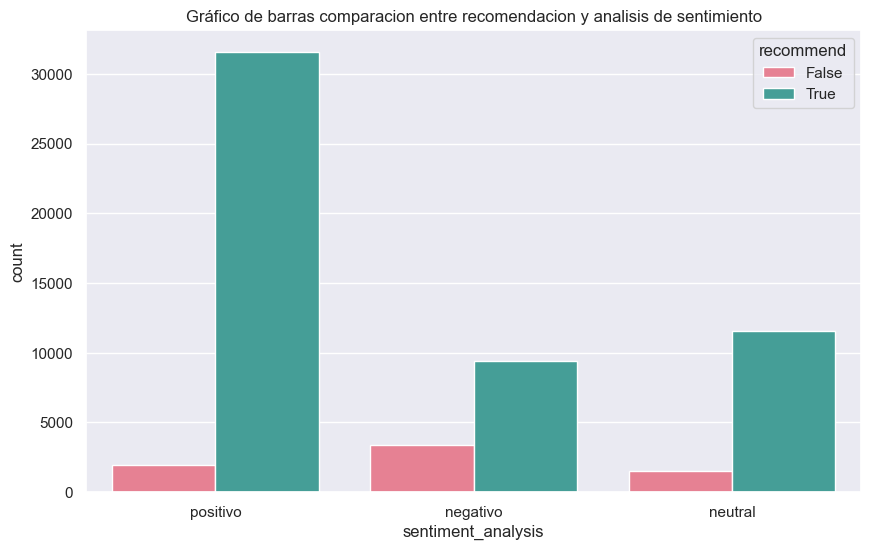

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme()

# Aplana las listas en 'sentiment_analysis' y 'recommend'
sentiment_analysis_flat = pd.Series([item for sublist in df_user_reviews['sentiment_analysis'] for item in sublist])
recommend_flat = pd.Series([item for sublist in df_user_reviews['recommend'] for item in sublist])

# Crea un DataFrame a partir de las series aplanadas
df = pd.DataFrame({'sentiment_analysis': sentiment_analysis_flat, 'recommend': recommend_flat})

# Reemplaza los valores en 'sentiment_analysis' con 'positivo', 'neutral' y 'negativo'
df['sentiment_analysis'] = df['sentiment_analysis'].replace({2: 'positivo', 1: 'neutral', 0: 'negativo'})

# Crea un gráfico de barras
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='sentiment_analysis', hue='recommend', palette='husl')
plt.title('Gráfico de barras comparacion entre recomendacion y analisis de sentimiento')
plt.show()


## User_Items

In [25]:
df_user_items= pd.read_csv("Datos-Normalizados/australian_users_items_normalizado.csv")

In [26]:
df_user_items.sample(10)

,Unnamed: 0,user_id,items_count,steam_id,user_url,items
27541,32004,ryanvilliers,59,76561198054268891,http://steamcommunity.com/id/ryanvilliers,"[{'item_id': '4000', 'item_name': ""Garry's Mod..."
21968,25521,dogD,95,76561198019448680,http://steamcommunity.com/id/dogD,"[{'item_id': '4000', 'item_name': ""Garry's Mod..."
4218,4820,2011368123,252,76561198042598239,http://steamcommunity.com/id/2011368123,"[{'item_id': '220', 'item_name': 'Half-Life 2'..."
13250,15307,Unscripteddd,18,76561198074740260,http://steamcommunity.com/id/Unscripteddd,"[{'item_id': '4000', 'item_name': ""Garry's Mod..."
15281,17658,WillZENex,12,76561198102704434,http://steamcommunity.com/id/WillZENex,"[{'item_id': '17470', 'item_name': 'Dead Space..."
57485,69779,76561198074137750,1,76561198074137750,http://steamcommunity.com/profiles/76561198074...,"[{'item_id': '212180', 'item_name': 'Combat Ar..."
62975,77063,76561198086172486,7,76561198086172486,http://steamcommunity.com/profiles/76561198086...,"[{'item_id': '205790', 'item_name': 'Dota 2 Te..."
44198,51752,76561198044765968,13,76561198044765968,http://steamcommunity.com/profiles/76561198044...,"[{'item_id': '42910', 'item_name': 'Magicka', ..."
2879,3320,76561198092005436,67,76561198092005436,http://steamcommunity.com/profiles/76561198092...,"[{'item_id': '220', 'item_name': 'Half-Life 2'..."
3789,4336,76561198062091405,58,76561198062091405,http://steamcommunity.com/profiles/76561198062...,"[{'item_id': '4000', 'item_name': ""Garry's Mod..."


In [27]:
df_user_items['items']

0        [{'item_id': '10', 'item_name': 'Counter-Strik...
1        [{'item_id': '10', 'item_name': 'Counter-Strik...
2        [{'item_id': '1200', 'item_name': 'Red Orchest...
3        [{'item_id': '10', 'item_name': 'Counter-Strik...
4        [{'item_id': '300', 'item_name': 'Day of Defea...
                               ...                        
70934    [{'item_id': '11020', 'item_name': 'TrackMania...
70935    [{'item_id': '218230', 'item_name': 'PlanetSid...
70936    [{'item_id': '413850', 'item_name': 'CS:GO Pla...
70937    [{'item_id': '11020', 'item_name': 'TrackMania...
70938    [{'item_id': '304930', 'item_name': 'Unturned'...
Name: items, Length: 70939, dtype: object

In [28]:
df_user_items=df_user_items.dropna()

In [29]:
df_user_items['items'] = df_user_items['items'].apply(lambda x: eval(x) if pd.notna(x) else [])


In [30]:
df_user_items['item_id'] = df_user_items['items'].apply(lambda reviews: [review['item_id'] for review in reviews])


In [31]:
df_user_items['item_name'] = df_user_items['items'].apply(lambda reviews: [review['item_name'] for review in reviews])

In [32]:
df_user_items['playtime_forever'] = df_user_items['items'].apply(lambda reviews: [review['playtime_forever'] for review in reviews])

In [33]:
df_user_items['playtime_2weeks'] = df_user_items['items'].apply(lambda reviews: [review['playtime_2weeks'] for review in reviews])

In [34]:
df_user_items.sample(10)

,Unnamed: 0,user_id,items_count,steam_id,user_url,items,item_id,item_name,playtime_forever,playtime_2weeks
48161,56623,76561198057083857,1,76561198057083857,http://steamcommunity.com/profiles/76561198057...,"[{'item_id': '205790', 'item_name': 'Dota 2 Te...",[205790],[Dota 2 Test],[0],[0]
52903,62800,76561198067084048,7,76561198067084048,http://steamcommunity.com/profiles/76561198067...,"[{'item_id': '550', 'item_name': 'Left 4 Dead ...","[550, 223530, 204100, 63380, 222900, 243870, 2...","[Left 4 Dead 2, Left 4 Dead 2 Beta, Max Payne ...","[1064, 0, 1761, 24, 0, 496, 47]","[0, 0, 0, 0, 0, 0, 0]"
61709,75422,RickyGrimes,17,76561198083420497,http://steamcommunity.com/id/RickyGrimes,"[{'item_id': '4000', 'item_name': 'Garry's Mod...","[4000, 1250, 35420, 550, 223530, 57300, 31280,...","[Garry's Mod, Killing Floor, Killing Floor Mod...","[10732, 50, 0, 1378, 0, 406, 214, 52, 749, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
69762,86775,76561198125780191,1,76561198125780191,http://steamcommunity.com/profiles/76561198125...,"[{'item_id': '202170', 'item_name': 'Sleeping ...",[202170],[Sleeping Dogs™],[0],[0]
37317,43426,76561197971362297,12,76561197971362297,http://steamcommunity.com/profiles/76561197971...,"[{'item_id': '10', 'item_name': 'Counter-Strik...","[10, 80, 100, 550, 223530, 730, 33900, 33930, ...","[Counter-Strike, Counter-Strike: Condition Zer...","[291, 0, 0, 5545, 0, 206, 1, 3, 0, 0, 0, 14]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
25725,29901,jessjenius,19,76561198075166574,http://steamcommunity.com/id/jessjenius,"[{'item_id': '12210', 'item_name': 'Grand Thef...","[12210, 12220, 400, 620, 42160, 206980, 55230,...","[Grand Theft Auto IV, Grand Theft Auto: Episod...","[0, 0, 124, 0, 0, 0, 841, 0, 542, 669, 521, 23...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 87, 0, 0, 0, 0, 0,..."
568,645,assassin_warman,165,76561198027176626,http://steamcommunity.com/id/assassin_warman,"[{'item_id': '220', 'item_name': 'Half-Life 2'...","[220, 340, 4000, 10090, 17410, 39530, 10180, 1...","[Half-Life 2, Half-Life 2: Lost Coast, Garry's...","[834, 0, 10154, 941, 422, 36, 497, 261, 72, 22...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
27960,32493,_maximus,274,76561198065082053,http://steamcommunity.com/id/_maximus,"[{'item_id': '1520', 'item_name': 'DEFCON', 'p...","[1520, 4700, 240, 4000, 4760, 20, 50, 70, 130,...","[DEFCON, Medieval II: Total War, Counter-Strik...","[40, 1686, 459, 12793, 34, 0, 0, 72, 0, 591, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
61719,75440,vlitx,32,76561198083445681,http://steamcommunity.com/id/vlitx,"[{'item_id': '240', 'item_name': 'Counter-Stri...","[240, 4000, 23490, 31280, 70000, 24240, 205790...","[Counter-Strike: Source, Garry's Mod, Tropico ...","[125, 2550, 0, 347, 20, 184, 0, 208, 32, 3386,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
56293,67992,dber58,3,76561198072345762,http://steamcommunity.com/id/dber58,"[{'item_id': '296470', 'item_name': 'Mount You...","[296470, 295270, 730]","[Mount Your Friends, Football Manager 2015, Co...","[0, 4417, 155]","[0, 0, 0]"


C:\Users\Facundete\AppData\Local\Temp\ipykernel_7740\1384971458.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='item_name', x='playtime_forever', data=df_sorted, palette='viridis')


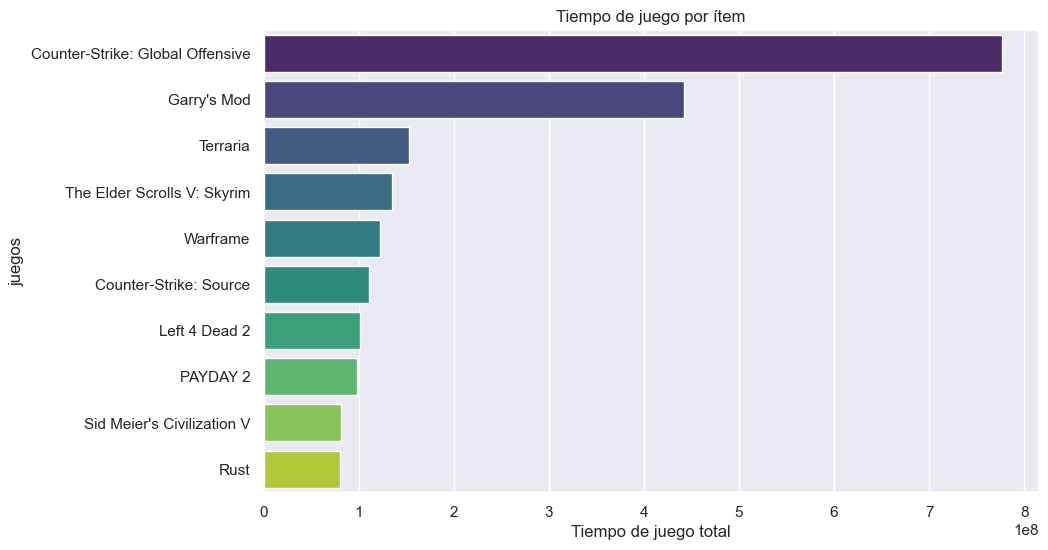

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Aplana las listas en 'item_name' y 'playtime_forever'
item_name_flat = pd.Series([item for sublist in df_user_items['item_name'] for item in sublist])
playtime_forever_flat = pd.Series([item for sublist in df_user_items['playtime_forever'] for item in sublist])

# Crea un DataFrame a partir de las series aplanadas
df_flat = pd.DataFrame({'item_name': item_name_flat, 'playtime_forever': playtime_forever_flat})

# Agrupa por 'item_name' y calcula la suma de 'playtime_forever' para cada ítem
df_grouped = df_flat.groupby('item_name')['playtime_forever'].sum().reset_index()

# Ordena los ítems por 'playtime_forever' en orden descendente y toma los primeros 10
df_sorted = df_grouped.sort_values('playtime_forever', ascending=False).head(10)

# Establece el tema de seaborn
sns.set_theme()

# Crea un gráfico de barras vertical con seaborn
plt.figure(figsize=(10,6))
sns.barplot(y='item_name', x='playtime_forever', data=df_sorted, palette='viridis')
plt.ylabel('juegos')
plt.xlabel('Tiempo de juego total')
plt.title('Tiempo de juego por ítem')
plt.show()


In [36]:
df.columns

Index(['sentiment_analysis', 'recommend'], dtype='object')

In [37]:
df_merged = df_user_items.merge(df_user_reviews, on='user_id', how='left')


In [38]:
df_merged.sample(5)


,Unnamed: 0,user_id,items_count,steam_id,user_url_x,items,item_id_x,item_name,playtime_forever,playtime_2weeks,user_url_y,reviews,review_content,item_id_y,sentiment_analysis,recommend
53246,62860,76561198067148566,7,76561198067148566,http://steamcommunity.com/profiles/76561198067...,"[{'item_id': '205790', 'item_name': 'Dota 2 Te...","[205790, 273110, 304050, 304930, 291480, 22794...","[Dota 2 Test, Counter-Strike Nexon: Zombies, T...","[0, 220, 0, 0, 125, 47, 0]","[0, 0, 0, 0, 0, 0, 0]",NaN,NaN,NaN,NaN,NaN,NaN
17687,20210,76561198080931200,11,76561198080931200,http://steamcommunity.com/profiles/76561198080...,"[{'item_id': '4000', 'item_name': 'Garry's Mod...","[4000, 105600, 57740, 113400, 236390, 224260, ...","[Garry's Mod, Terraria, Jagged Alliance - Back...","[555, 1409, 135, 12663, 803, 315, 6921, 2124, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",NaN,NaN,NaN,NaN,NaN,NaN
47443,55385,76561198053872260,53,76561198053872260,http://steamcommunity.com/profiles/76561198053...,"[{'item_id': '220', 'item_name': 'Half-Life 2'...","[220, 340, 240, 4000, 12120, 12250, 20, 50, 70...","[Half-Life 2, Half-Life 2: Lost Coast, Counter...","[0, 0, 41, 673, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN,NaN,NaN,NaN,NaN,NaN
32349,37253,leovelani,89,76561198076886723,http://steamcommunity.com/id/leovelani,"[{'item_id': '10', 'item_name': 'Counter-Strik...","[10, 80, 100, 4000, 22300, 12210, 1250, 35420,...","[Counter-Strike, Counter-Strike: Condition Zer...","[1882, 16, 0, 143, 261, 2538, 163, 0, 22, 22, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN,NaN,NaN,NaN,NaN,NaN
52563,61914,xMedian,31,76561198066022916,http://steamcommunity.com/id/xMedian,"[{'item_id': '70', 'item_name': 'Half-Life', '...","[70, 220, 340, 4000, 400, 20, 50, 130, 280, 32...","[Half-Life, Half-Life 2, Half-Life 2: Lost Coa...","[131, 693, 18, 5985, 0, 9, 0, 91, 0, 72, 0, 21...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",http://steamcommunity.com/id/xMedian,"[{'sentiment_analysis': 2, 'funny': '', 'poste...","['Love it brilliant best cod ever made', 'Very...","[202970, 244590, 208090, 209870]","[2, 0, 2, 2]","[True, True, True, True]"


In [39]:
df_merged.columns

Index(['Unnamed: 0', 'user_id', 'items_count', 'steam_id', 'user_url_x',
       'items', 'item_id_x', 'item_name', 'playtime_forever',
       'playtime_2weeks', 'user_url_y', 'reviews', 'review_content',
       'item_id_y', 'sentiment_analysis', 'recommend'],
      dtype='object')

In [40]:
df_merged=df_merged.drop('Unnamed: 0', axis=1)
df_merged=df_merged.drop('items', axis=1)
df_merged=df_merged.drop('reviews', axis=1)
df_merged=df_merged.drop('user_url_y', axis=1)

In [41]:
df_merged.sample(3)

,user_id,items_count,steam_id,user_url_x,item_id_x,item_name,playtime_forever,playtime_2weeks,review_content,item_id_y,sentiment_analysis,recommend
13259,76561198057728382,188,76561198057728382,http://steamcommunity.com/profiles/76561198057...,"[4000, 4700, 2590, 9450, 4560, 9340, 20540, 22...","[Garry's Mod, Medieval II: Total War, Alpha Pr...","[459, 4600, 0, 1198, 0, 0, 0, 280, 0, 624, 0, ...","[0, 843, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[""Graphically it's horrible, that said this is...","[48700, 433090, 65740]","[1, 1, 2]","[True, True, True]"
42080,76561198035247974,9,76561198035247974,http://steamcommunity.com/profiles/76561198035...,"[1250, 35420, 10180, 10190, 42680, 42690, 2029...","[Killing Floor, Killing Floor Mod: Defence All...","[3501, 7, 1175, 21836, 1947, 22663, 598, 1302,...","[0, 0, 0, 0, 0, 0, 0, 0, 0]",NaN,NaN,NaN,NaN
30178,mysterys,75,76561198090273286,http://steamcommunity.com/id/mysterys,"[10, 80, 100, 4000, 400, 12150, 12900, 17410, ...","[Counter-Strike, Counter-Strike: Condition Zer...","[402, 68, 62, 13395, 228, 154, 227, 842, 644, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",['Broke my left Arm in a Real Life Parkour11/1...,"[17410, 440, 730, 319510, 10180, 208090, 42680]","[2, 0, 1, 0, 2, 1, 1]","[True, True, True, True, True, True, False]"


In [42]:
df_merged = df_merged.rename(columns={'user_url_x': 'user_url'})

In [43]:
df_merged.sample(3)

,user_id,items_count,steam_id,user_url,item_id_x,item_name,playtime_forever,playtime_2weeks,review_content,item_id_y,sentiment_analysis,recommend
60376,nightres,7,76561198079899077,http://steamcommunity.com/id/nightres,"[220, 340, 301520, 227940, 205790, 730, 291550]","[Half-Life 2, Half-Life 2: Lost Coast, Robocra...","[1, 0, 0, 0, 0, 2449, 176]","[0, 0, 0, 0, 0, 801, 19]",NaN,NaN,NaN,NaN
34270,GIFF_TECHIES,129,76561198080087044,http://steamcommunity.com/id/GIFF_TECHIES,"[240, 4000, 23310, 550, 223530, 8190, 28000, 4...","[Counter-Strike: Source, Garry's Mod, The Last...","[34, 3028, 9, 436, 0, 1, 0, 1, 0, 396, 99, 791...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN,NaN,NaN,NaN
46249,76561198049802586,15,76561198049802586,http://steamcommunity.com/profiles/76561198049...,"[550, 223530, 31280, 730, 49520, 200710, 22454...","[Left 4 Dead 2, Left 4 Dead 2 Beta, Poker Nigh...","[6450, 0, 193, 959, 11543, 1843, 106, 1683, 51...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",NaN,NaN,NaN,NaN


In [44]:
df_merged.to_json('steam_user_info.json.gzip', orient='records', lines=True, compression="gzip")

In [45]:
df_user_items.info

<bound method DataFrame.info of        Unnamed: 0            user_id  items_count           steam_id  \
0               0  76561197970982479          277  76561197970982479   
1               1            js41637          888  76561198035864385   
2               2          evcentric          137  76561198007712555   
3               3         Riot-Punch          328  76561197963445855   
4               4              doctr          541  76561198002099482   
...           ...                ...          ...                ...   
70934       88303  76561198320136420          321  76561198320136420   
70935       88304          ArkPlays7            4  76561198321542621   
70936       88305  76561198323066619           22  76561198323066619   
70937       88306  76561198326700687          177  76561198326700687   
70938       88308  76561198329548331            7  76561198329548331   

                                                user_url  \
0      http://steamcommunity.com/profiles/7

In [46]:
df_user_reviews.info

<bound method DataFrame.info of                  user_id                                           user_url  \
0      76561197970982479  http://steamcommunity.com/profiles/76561197970...   
1                js41637               http://steamcommunity.com/id/js41637   
2              evcentric             http://steamcommunity.com/id/evcentric   
3                  doctr                 http://steamcommunity.com/id/doctr   
4              maplemage             http://steamcommunity.com/id/maplemage   
...                  ...                                                ...   
25794  76561198306599751  http://steamcommunity.com/profiles/76561198306...   
25795           Ghoustik              http://steamcommunity.com/id/Ghoustik   
25796  76561198310819422  http://steamcommunity.com/profiles/76561198310...   
25797  76561198312638244  http://steamcommunity.com/profiles/76561198312...   
25798        LydiaMorley           http://steamcommunity.com/id/LydiaMorley   

                   

In [47]:
merged_data = pd.merge(df_user_items, df_user_reviews, on='user_id', how='left')

In [48]:
merged_data.sample(2)

,Unnamed: 0,user_id,items_count,steam_id,user_url_x,items,item_id_x,item_name,playtime_forever,playtime_2weeks,user_url_y,reviews,review_content,item_id_y,sentiment_analysis,recommend
54455,64666,76561198069138620,10,76561198069138620,http://steamcommunity.com/profiles/76561198069...,"[{'item_id': '4000', 'item_name': 'Garry's Mod...","[4000, 24960, 39160, 42680, 42690, 205790, 170...","[Garry's Mod, Battlefield: Bad Company 2, Dung...","[83, 96, 7, 104, 144, 0, 14, 227, 111, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",NaN,NaN,NaN,NaN,NaN,NaN
63891,77892,76561198087590918,1,76561198087590918,http://steamcommunity.com/profiles/76561198087...,"[{'item_id': '205790', 'item_name': 'Dota 2 Te...",[205790],[Dota 2 Test],[0],[0],NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
merged_data.info

<bound method DataFrame.info of        Unnamed: 0            user_id  items_count           steam_id  \
0               0  76561197970982479          277  76561197970982479   
1               1            js41637          888  76561198035864385   
2               2          evcentric          137  76561198007712555   
3               3         Riot-Punch          328  76561197963445855   
4               4              doctr          541  76561198002099482   
...           ...                ...          ...                ...   
71230       88303  76561198320136420          321  76561198320136420   
71231       88304          ArkPlays7            4  76561198321542621   
71232       88305  76561198323066619           22  76561198323066619   
71233       88306  76561198326700687          177  76561198326700687   
71234       88308  76561198329548331            7  76561198329548331   

                                              user_url_x  \
0      http://steamcommunity.com/profiles/7